In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.1.2'

In [3]:
idf = pd.read_csv('../../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


In [39]:
pedf = pd.read_csv('../../../../pffap/data/indu_px_last_1989-2018.csv',index_col=0,parse_dates=True)
pedf.columns = [x.split()[0] for x in pedf.columns]
pedf = pedf.iloc[-144:]

In [40]:
pedf.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,INDU
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,12.2471,58.22,89.56,64.07,26.59,72.88,34.7024,27.9274,212.16,40.74,...,64.87,50.85,52.26,68.02,NaN,35.8322,NaN,47.69,74.10,12621.69
2007-02-28,12.0871,56.87,87.27,64.42,25.94,68.61,33.8045,29.4468,201.60,39.60,...,63.49,50.76,52.20,65.63,NaN,34.8182,NaN,48.30,71.68,12268.63
2007-03-30,13.2729,56.40,88.91,67.03,25.53,73.96,33.9722,30.8318,206.63,36.74,...,63.16,51.77,52.97,65.00,NaN,35.2740,NaN,46.95,75.45,12354.35
2007-04-30,14.2571,60.67,93.00,72.62,26.74,77.79,34.5149,29.9914,218.61,37.87,...,64.31,54.10,53.06,67.13,NaN,35.5159,NaN,47.92,79.38,13062.91
2007-05-31,17.3657,64.98,100.59,78.58,26.92,81.49,34.9688,30.5091,230.82,38.87,...,63.55,54.17,54.77,70.55,NaN,40.4926,NaN,47.60,83.17,13627.64


In [46]:
countLT144 = pedf.count() < 144
cols_with_less_than_144 = pedf.columns[countLT144]
pedf = pedf.drop(cols_with_less_than_144,axis=1)
pedf = pedf.drop('INDU',axis=1)
pedf.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,12.2471,58.22,89.56,64.07,26.59,72.88,34.7024,27.9274,212.16,40.74,...,30.86,12.3513,26.24,64.87,50.85,52.26,68.02,35.8322,47.69,74.10
2007-02-28,12.0871,56.87,87.27,64.42,25.94,68.61,33.8045,29.4468,201.60,39.60,...,28.17,13.0588,24.96,63.49,50.76,52.20,65.63,34.8182,48.30,71.68
2007-03-30,13.2729,56.40,88.91,67.03,25.53,73.96,33.9722,30.8318,206.63,36.74,...,27.87,13.2825,25.26,63.16,51.77,52.97,65.00,35.2740,46.95,75.45
2007-04-30,14.2571,60.67,93.00,72.62,26.74,77.79,34.5149,29.9914,218.61,37.87,...,29.94,13.4650,26.46,64.31,54.10,53.06,67.13,35.5159,47.92,79.38
2007-05-31,17.3657,64.98,100.59,78.58,26.92,81.49,34.9688,30.5091,230.82,38.87,...,30.67,14.1875,27.49,63.55,54.17,54.77,70.55,40.4926,47.60,83.17


In [47]:
import mplfinance as mpf

In [51]:
ap = mpf.make_addplot(pedf,type='bar')

nulldata = [float('nan')]*len(pedf)
d = dict(Open=nulldata,High=nulldata,Low=nulldata,Close=nulldata)

df = pd.DataFrame(d,index=pedf.index)

#mpf.plot()

In [52]:
df.head()

,Open,High,Low,Close
Date,,,,
2007-01-31,NaN,NaN,NaN,NaN
2007-02-28,NaN,NaN,NaN,NaN
2007-03-30,NaN,NaN,NaN,NaN
2007-04-30,NaN,NaN,NaN,NaN
2007-05-31,NaN,NaN,NaN,NaN


/home/dino/code/mplfinance/src/mplfinance/plotting.py:414: RuntimeWarning: All-NaN slice encountered
  miny = np.nanmin(_lows)
/home/dino/code/mplfinance/src/mplfinance/plotting.py:415: RuntimeWarning: All-NaN slice encountered
  maxy = np.nanmax(_highs)
/home/dino/code/mplfinance/src/mplfinance/plotting.py:516: RuntimeWarning: All-NaN slice encountered
  lo = math.log(max(math.fabs(np.nanmin(lows)),1e-7),10) - 0.5
/home/dino/code/mplfinance/src/mplfinance/plotting.py:517: RuntimeWarning: All-NaN slice encountered
  hi = math.log(max(math.fabs(np.nanmax(highs)),1e-7),10) + 0.5


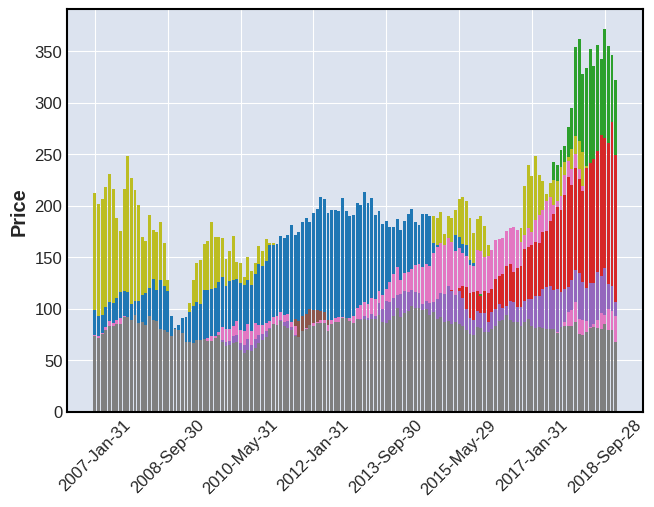

In [53]:
mpf.plot(df,addplot=ap)

In [54]:
pedf.shape

(144, 28)

In [55]:
pedf = pedf.loc['1/1/2011':'12/31/2015',:]

In [56]:
pedf.shape
pedf.head()
pedf.tail()

(60, 28)

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-31,48.4743,43.38,69.48,97.01,21.15,94.93,38.87,23.8533,163.62,36.77,...,27.725,20.6200,18.22,63.13,56.26,41.05,81.30,35.62,56.07,80.68
2011-02-28,50.4586,43.57,72.01,102.93,18.56,103.75,43.74,24.9827,163.78,37.47,...,26.580,22.2575,19.24,63.05,59.93,42.58,83.54,36.92,51.98,85.53
2011-03-31,49.7786,45.20,73.93,111.35,17.15,107.43,43.09,25.3794,158.47,37.06,...,25.360,18.9250,20.31,61.60,59.48,45.20,84.65,38.54,52.05,84.13
2011-04-29,49.7471,49.08,79.78,115.41,17.56,109.44,43.10,27.5577,151.01,37.14,...,26.020,20.5800,20.96,64.90,63.28,49.23,89.58,37.78,54.98,88.00
2011-05-31,49.6900,51.60,78.03,105.80,16.80,104.91,41.63,24.2903,140.73,36.28,...,25.010,21.1125,21.45,67.00,62.08,48.95,87.77,36.93,55.22,83.47


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,MSFT,NKE,PFE,PG,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,112.76,76.72,130.68,76.44,25.880,80.99,101.88,29.4199,188.60,116.46,...,43.52,55.875,32.22,70.67,99.55,115.70,91.61,46.01,64.73,75.24
2015-09-30,110.30,74.13,130.95,65.36,26.250,78.88,102.20,28.5056,173.76,115.49,...,44.26,61.485,31.41,71.94,99.53,116.01,88.99,43.51,64.84,74.35
2015-10-30,119.50,73.26,148.07,72.99,28.850,90.88,113.74,34.7378,187.50,123.64,...,52.64,65.515,33.82,76.38,112.89,117.78,98.41,46.88,57.24,82.74
2015-11-30,118.30,71.64,145.45,72.65,27.250,91.32,113.47,35.0471,190.02,133.88,...,54.35,66.140,32.77,74.84,114.57,112.71,96.05,45.45,58.84,81.66
2015-12-31,105.26,69.55,144.59,67.96,27.155,89.96,105.08,34.6101,180.23,132.25,...,55.48,62.500,32.28,79.41,112.86,117.64,96.07,46.22,61.30,77.95


In [74]:
pedf = pedf.iloc[:,0:8]

In [75]:
print(pedf.shape)
print(pedf.head(3))
print(pedf.tail(2))

(60, 8)
               AAPL    AXP     BA     CAT   CSCO     CVX    DIS     DWDP
Date                                                                    
2011-01-31  48.4743  43.38  69.48   97.01  21.15   94.93  38.87  23.8533
2011-02-28  50.4586  43.57  72.01  102.93  18.56  103.75  43.74  24.9827
2011-03-31  49.7786  45.20  73.93  111.35  17.15  107.43  43.09  25.3794
              AAPL    AXP      BA    CAT    CSCO    CVX     DIS     DWDP
Date                                                                    
2015-11-30  118.30  71.64  145.45  72.65  27.250  91.32  113.47  35.0471
2015-12-31  105.26  69.55  144.59  67.96  27.155  89.96  105.08  34.6101


In [88]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

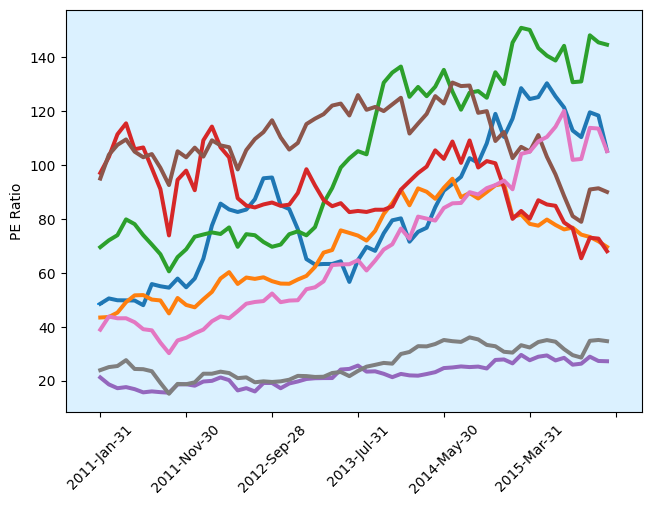

In [92]:
ap = mpf.make_addplot(pedf.iloc[:,0:8],secondary_y=False)

nulldata = [float('nan')]*len(pedf)
#nulldata = [20.]*len(pedf)
nulldata[0] = pedf.iloc[0,0]
d = dict(Open=nulldata,High=nulldata,Low=nulldata,Close=nulldata)

df = pd.DataFrame(d,index=pedf.index)

mpf.plot(df,addplot=ap,ylabel='PE Ratio',style='blueskies')

In [80]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

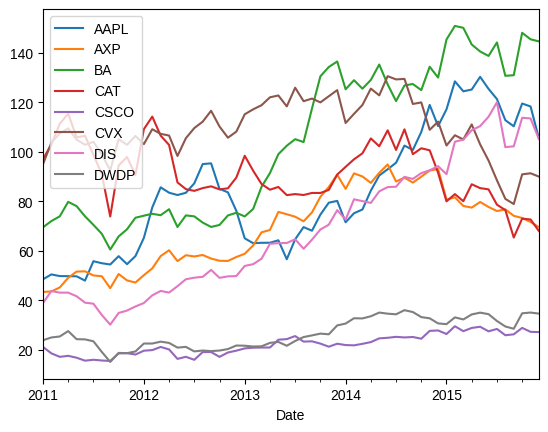

In [83]:
with plt.style.context('default'):
    pedf.plot()